In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Language dataset.csv')
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


# Exploratory Data Analysis :

In [3]:
# Checking shape of the dataset

df.shape

(22000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


There are no null values in our dataset.

Memory used by the dataset is 343.9+ KB.

In [5]:
#Checking for unique values in each feature

df.nunique()

Text        21859
language       22
dtype: int64

In [6]:
df['language'].value_counts()

English       1000
Arabic        1000
Korean        1000
Urdu          1000
Thai          1000
Chinese       1000
Pushto        1000
Persian       1000
Russian       1000
Tamil         1000
Swedish       1000
Estonian      1000
Portugese     1000
Spanish       1000
Hindi         1000
Japanese      1000
French        1000
Romanian      1000
Turkish       1000
Dutch         1000
Indonesian    1000
Latin         1000
Name: language, dtype: int64

__There are 22 languages in our dataset and each language has 1000 sentences.__

In [7]:
# Checking for null values

df.isnull().sum()

Text        0
language    0
dtype: int64

__There are no null values.__

We can also visualize and check :

In [8]:
# First importing the seaborn library

import seaborn as sns

<AxesSubplot:>

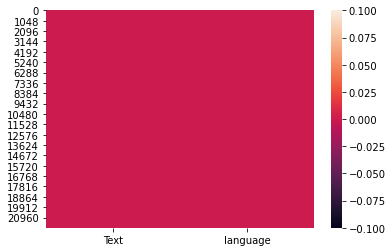

In [9]:
sns.heatmap(df.isnull())

In [10]:
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='language', ylabel='count'>

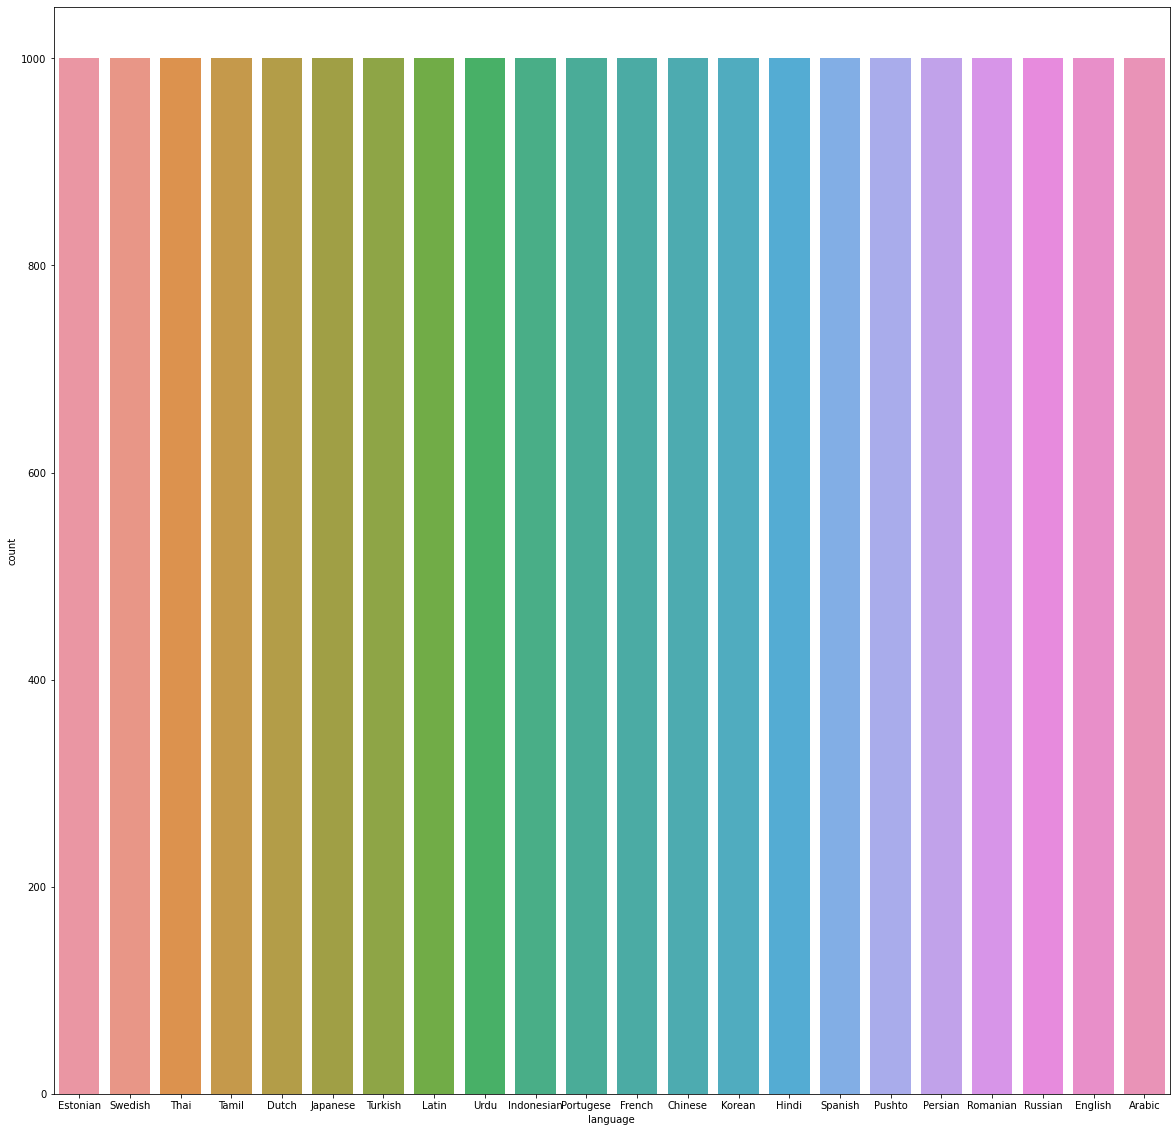

In [11]:
# Visualizing sentences per language

plt.figure(figsize=(20,20))
sns.countplot(df['language'])

In [12]:
df['language'][55]

'Turkish'

In [13]:
df['Text'][55]

'arianespace şirketi vegayı kutupsal ve güneş eşzamanlı yörüngelere gidecek olan görevler için uyarlanmış bir fırlatma sistemi olarak pazarlamaktadır yeterlilik kanıtlama uçuşunda vega ana görev-yükü olan  kg ağırlığındaki lares uydusunu  km yükseklikteki dairesel bir yörüngeye çıkararak  derecelik bir eğimle yerleştirmiştir'

# Count Vectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

x=np.array(df["Text"])
y=np.array(df["language"])

cv=CountVectorizer()
x=cv.fit_transform(x)

# LabelEncoding (Convert language name into 1,2,3....etc)

In [15]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(df['language'])

In [16]:
y

array([ 4, 17, 19, ..., 16,  1, 14])

In [17]:
label.classes_

array(['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French',
       'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian',
       'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish',
       'Tamil', 'Thai', 'Turkish', 'Urdu'], dtype=object)

# Machine Learning Models :

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score 

# Finding best random state :

In [19]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17600, 277720), (4400, 277720), (17600,), (4400,))

# Required Evaluation Metrices :

In [21]:
mnb = MultinomialNB()

In [22]:
mnb.fit(x_train,y_train)
mnb.score(x_train, y_train)
pred_mnb=mnb.predict(x_test)
print('Accuracy score of',mnb,'is:')
print(accuracy_score(y_test,pred_mnb))
print(confusion_matrix(y_test, pred_mnb))
print(classification_report(y_test,pred_mnb))
print('\n')

Accuracy score of MultinomialNB() is:
0.9547727272727272
[[193   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0 104   0  20   0   2   0   0  67   0   0   0   0   0   0   0   3   1
    0   0   0   0]
 [  0   0 204   1   0   2   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0 200   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   2 171   1   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   1   0]
 [  0   0   0   1   0 195   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   4   0   0 188   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   1   0   0   0 191   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   9   0   6   1   4   0   1 156   0   0   0   0   0   0   1   2   1
    0   0   1   0]
 [  0   0   0   0   0   0   0   0   2 202   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0

In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(x_train,y_train)
lr.score(x_train, y_train)
pred_lr=lr.predict(x_test)
print('Accuracy score of',lr,'is:')
print(accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test,pred_lr))
print('\n')

Accuracy score of LogisticRegression() is:
0.9470454545454545
[[191   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0 105   0   3   0   0   0   0  87   0   0   0   0   0   0   0   2   0
    0   0   0   0]
 [  0   0 206   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   3   0 195   0   0   0   0   1   0   1   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   1   0   2 167   0   0   0   6   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0 194   0   0   0   0   2   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   2   0   0 186   1   3   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   1   0   0   0 190   1   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  12   1   0   0   0   0   0 168   0   0   0   0   0   1   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0  14 190   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   

In [25]:
dtc = DecisionTreeClassifier()

In [26]:
dtc.fit(x_train,y_train)
dtc.score(x_train, y_train)
pred_dtc=dtc.predict(x_test)
print('Accuracy score of',dtc,'is:')
print(accuracy_score(y_test, pred_dtc))
print(confusion_matrix(y_test, pred_dtc))
print(classification_report(y_test, pred_dtc))
print('\n')

Accuracy score of DecisionTreeClassifier() is:
0.8972727272727272
[[191   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  74 110   6   0   0   0   1   0   0   0   0   2   0   0   0   3   0
    0   1   0   0]
 [  0   0 197   1   0   1   0   2   1   0   1   0   0   0   0   0   5   0
    0   0   0   0]
 [  0   7   1 180   1   0   1   2   2   0   2   0   1   1   0   0   1   0
    0   0   1   0]
 [  0   0   6   2 163   0   0   0   1   0   4   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   2   0   1 189   0   0   0   0   3   0   0   0   0   0   1   0
    0   0   0   0]
 [  0   1   4   3   0   0 183   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   1   1   0   0   0 187   2   0   0   0   0   0   0   0   1   0
    0   0   0   0]
 [  0  14  85   1   0   0   0   1  80   0   0   0   0   0   0   0   1   0
    0   0   0   0]
 [  0   1  21   0   0   0   0   0   1 181   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  

In [27]:
knc = KNeighborsClassifier()

In [28]:
knc.fit(x_train,y_train)
knc.score(x_train, y_train)
pred_knc=knc.predict(x_test)
print('Accuracy score of',knc,'is:')
print(accuracy_score(y_test, pred_knc))
print(confusion_matrix(y_test, pred_knc))
print(classification_report(y_test, pred_knc))
print('\n')

Accuracy score of KNeighborsClassifier() is:
0.5475
[[ 84   0   0   0   0   0   0   0 109   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  12   0   2   0   0   0   0 181   0   1   0   0   0   0   0   1   0
    0   0   0   0]
 [  0   0 186   0   0   1   0   0  15   0   0   0   1   0   0   0   5   0
    0   0   0   0]
 [  0   1   9 140   1   0   0   0  46   0   0   0   2   0   1   0   0   0
    0   0   0   0]
 [  0   0   1   0  55   0   0   1 119   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   5   0   1 146   0   0  38   0   2   0   0   0   0   0   4   0
    0   0   0   0]
 [  0   0   0   2   0   0 170   0  20   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   1   0  94  97   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   3   0   0   0   0   0   0 178   0   0   0   0   0   0   0   1   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0 200   4   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   1   1 

In [29]:
svc = SVC()

In [30]:
svc.fit(x_train,y_train)
svc.score(x_train, y_train)
pred_svc=svc.predict(x_test)
print('Accuracy score of',svc,'is:')
print(accuracy_score(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))
print('\n')

Accuracy score of SVC() is:
0.8922727272727272
[[181   0   0   0   0   0   0   0   2   0   0   0   0  10   0   0   0   0
    0   0   0   0]
 [  0  62   0   3   0   0   0   0 119  11   0   0   0   0   0   0   2   0
    0   0   0   0]
 [  0   0 194   1   0   1   0   0   1   1   2   0   0   8   0   0   0   0
    0   0   0   0]
 [  0   5   0 185   0   0   0   0   1   0   0   0   0   9   0   0   0   0
    0   0   0   0]
 [  0   2   0   1 158   0   0   0  11   1   1   0   0   2   0   0   0   0
    0   0   0   0]
 [  0   0   0   1   0 188   0   0   0   0   2   0   0   5   0   0   0   0
    0   0   0   0]
 [  0   1   0   4   0   0 177   0   3   0   0   0   0   7   0   0   0   0
    0   0   0   0]
 [  0   0   0   1   0   0   0 181   1   0   0   0   0   9   0   0   0   0
    0   0   0   0]
 [  0  15   0   1   0   0   0   0 157   7   0   0   0   0   1   0   1   0
    0   0   0   0]
 [  0   8   0   0   0   0   0   0   5 188   0   0   0   3   0   0   0   0
    0   0   0   0]
 [  0   8   0   4   0  

The best model is MultinomialNB with the highest accuracy score of 0.9547727272727272.

In [31]:
pred_mnb

array([10, 14, 20, ..., 19, 21, 17])

In [32]:
y_test

array([10, 14, 20, ..., 19, 21, 17])

In [33]:
pd.DataFrame(np.c_[df['Text'],df['language'],y],columns=['Sentence','Language','Encoded'])

,Sentence,Language,Encoded
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,4
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,17
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,19
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,18
4,de spons behoort tot het geslacht haliclona en...,Dutch,2
...,...,...,...
21995,hors du terrain les années et sont des année...,French,5
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai,19
21997,con motivo de la celebración del septuagésimoq...,Spanish,16
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese,1


# Actual Language and Predicted Language :

In [34]:
pred_df = pd.DataFrame(np.c_[y_test,pred_mnb],columns=['Actual','Predicted'])
pred_df

,Actual,Predicted
0,10,10
1,14,14
2,20,20
3,16,16
4,12,12
...,...,...
4395,20,20
4396,1,1
4397,19,19
4398,21,21


# Saving the best model :

In [35]:
import pickle
filename='Language_Identification.pkl'
pickle.dump(mnb,open(filename,'wb'))

# Testing

In [38]:
user = input("Enter any text :")
text = cv.transform([user]).toarray()
prediction = mnb.predict(text)

languages = {
    'Arabic' : 0,
    'Chinese' : 1,
    'Dutch' : 2,
    'English' : 3,
    'Estonian' : 4,
    'French' : 5,
    'Hindi' : 6,
    'Indonesian' : 7,
    'Japanese' : 8,
    'Korean' : 9,
    'Latin' : 10,
    'Persian' : 11,
    'Portugese' : 12,
    'Pushto' : 13,
    'Romanian' : 14,
    'Russian' : 15,
    'Spanish' : 16,
    'Swedish' : 17,
    'Tamil' : 18,
    'Thai' : 19,
    'Turkish' : 20,
    'Urdu' : 21
    }

keys = list(languages)
values = list(languages.values())
position = values.index(prediction)
    
prediction = keys[position]


print(prediction)

Enter any text :how are you
English


In [41]:
languages.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

In [42]:
position 
    

3